In [1]:
import pandas as pd
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/home/sysadmin/zhicongchen/DataSets/phone_data/phone_data/tb_user_info_201202.csv')

In [3]:
data.tail()

,ACC_NBR,URBAN_RURAL_ID,CERTI_LATN,GENDER,AGE,CUST_LEVEL,CUST_WORK_TYPE,OS_TYPE,TERMINAL_PRICE,INNET_DATE,...,LOCAL_CALL_FEE,LONG_CALL_FEE,ROAM_CALL_FEE,CALL_FEE,VALUE_ADDED_FEE,SMS_FEE,STOP_CNT,OFR_CHANGE_CNT,INNET_FLOAT_AMT,INNET_DUR
382774,360119,-1,564,F,29,3,56,0,0,2011-03-10,...,90.95,67.57,5.4,163.92,0,8.80,0,2,0.02,0.15
382775,360173,0,551,M,52,4,56,0,265,2010-08-13,...,48.08,1.40,0.0,49.48,0,0.43,0,1,0.00,0.00
382776,360250,-1,551,F,38,3,56,0,0,2011-07-26,...,8.20,0.00,0.0,8.20,0,2.30,0,1,38.50,5.63
382777,360289,-1,551,M,37,4,56,0,300,2011-12-20,...,10.50,0.00,4.4,14.90,0,0.37,0,1,3.16,2.27
382778,360353,0,551,M,37,4,56,0,498,2009-12-26,...,7.03,1.00,0.0,8.03,0,0.00,0,1,0.00,0.07


In [3]:
# subdata = data[['TERMINAL_PRICE','CUST_LEVEL','CUST_WORK_TYPE','PROB_LEVEL','CONSUME_AMT','WEB_FEE','LOCAL_CALL_FEE','LONG_CALL_FEE','ROAM_CALL_FEE','CALL_FEE','VALUE_ADDED_FEE','SMS_FEE','INNET_FLOAT_AMT','INNET_DUR']]
subdata = data[['CONSUME_AMT','CALL_FEE']]
subdata = subdata.fillna(0)
subdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382779 entries, 0 to 382778
Data columns (total 2 columns):
CONSUME_AMT    382779 non-null float64
CALL_FEE       382779 non-null float64
dtypes: float64(2)
memory usage: 8.8 MB


In [4]:
subdata.iloc[382753, :]

CONSUME_AMT    100.36
CALL_FEE         0.00
Name: 382753, dtype: float64

In [5]:
consume = array(subdata)
type(consume)

numpy.ndarray

In [7]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(consume)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [8]:
centroids

array([[  26.12332758,   17.4263573 ],
       [ 129.72026396,   86.44420491]])

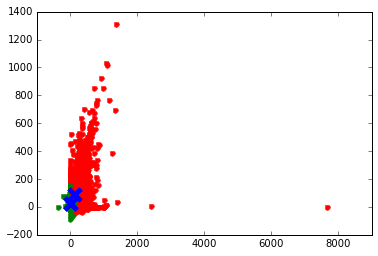

In [9]:
# colors = ["g.", "r.", "c.", "b.", "y."]
colors = ["g.", "r."]

for i in range(len(consume)):
    # print "coordinate:", consume[i], "label:", labels[i]
    plt.plot(consume[i][0], consume[i][1], colors[labels[i]], markersize=10)
    
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150, linewidth=5, zorder=10)
plt.show()